In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

%matplotlib inline

In [2]:
start=np.random.randint(3, size=1)[0]
print(type(start), start)
num_time_steps=51
time_steps=np.linspace(start, start+10, num_time_steps)
data=np.sin(time_steps)
data=data.reshape(-1, 1)
x=torch.tensor(data[:-1]).float().view(1, -1, 1)
y=torch.tensor(data[1:]).float().view(1, -1, 1)
print(x.shape, y.shape)

<class 'numpy.int32'> 1
torch.Size([1, 50, 1]) torch.Size([1, 50, 1])


In [3]:
class Net(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super(Net, self).__init__()
        
        self.hidden_size=hidden_size
        self.rnn=nn.RNN(input_size=input_size, hidden_size=hidden_size,
                       num_layers=1, batch_first=True)
        self.linear=nn.Linear(hidden_size, output_size)
        
    def forward(self, x, hidden_prev):
        out, hidden_prev=self.rnn(x, hidden_prev)
        out=out.view(-1, self.hidden_size)
        out=self.linear(out)
        out=out.unsqueeze(dim=0)
        return out,hidden_prev
    
input_size=1
hidden_size=10
output_size=1
model=Net(input_size, hidden_size, output_size)
print(model)

Net(
  (rnn): RNN(1, 10, batch_first=True)
  (linear): Linear(in_features=10, out_features=1, bias=True)
)


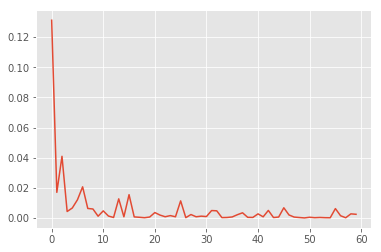

In [4]:
criterion=nn.MSELoss()
lr=0.001
optimizer=optim.Adam(model.parameters(), lr)
losses=[]
num_time_steps=51
hidden_prev=None
for itr in range(6000):
    start=torch.randint(10, size=(1,)).item()
    time_steps=torch.linspace(start, start+10, num_time_steps)
    data=torch.sin(time_steps)
    x=data[:-1].view(1, -1, 1)
    y=data[1:].view(1, -1, 1)

    output, hidden_prev = model(x, hidden_prev)
    hidden_prev=hidden_prev.detach()
    loss=criterion(output, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    itr+=1
    if itr%100==0:
#         print("Iter:{} loss{}".format(itr, loss.item()))
        losses.append(loss.item())
        
plt.style.use('ggplot')
plt.plot(losses)

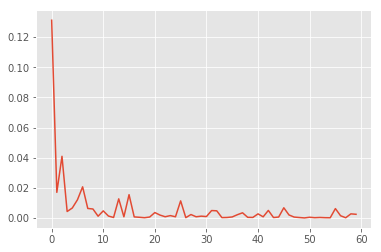

In [5]:
plt.style.use('ggplot')
plt.plot(losses)

(50,)


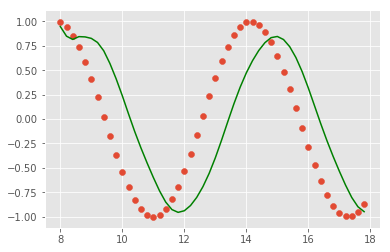

In [6]:
predictions=[]
input=x[:,0,:]
for _ in range(x.shape[1]):
    input=input.view([input.size(0), 1, input.size(1)])
    pred, hidden_prev=model(input, hidden_prev)
    input=pred
    predictions.append(pred.detach().numpy().ravel()[0])
    
rx=x.data.numpy().ravel()
print(time_steps[:-1].data.numpy().ravel().shape)
plt.scatter(time_steps[:-1], rx)
plt.plot(time_steps[:-1].data.numpy().ravel(),predictions, 'g')

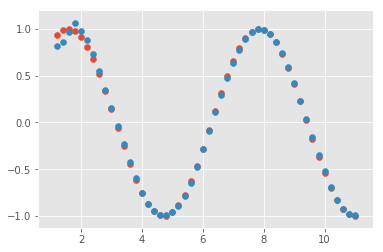

In [7]:
start=torch.randint(10, size=(1,)).item()
time_steps=torch.linspace(start, start+10, num_time_steps)
data=torch.sin(time_steps)
rx=data[:-1].view(1, -1, 1)
ry=data[1:].view(1, -1, 1)

output, hidden_prev = model(rx, hidden_prev)


plt.scatter(time_steps[1:],ry)
plt.scatter(time_steps[1:],output.data.numpy())